In [1]:
import os, json, random, time

from datetime import datetime
from datetime import timedelta
import subprocess as sp
from pathlib import Path

from decimal import Decimal

import requests
import pandas as pd
import numpy as np
from IPython.display import HTML, display


import plotly.express as px
import chart_studio.plotly as py

In [2]:
_repo_root = Path(os.environ['CURR_REPO_ROOT'])
us_gdp_parq_path = _repo_root / 'gdp_data' / 'US_Q1_2021_BEA.parq'
us_gdp_orc_path = _repo_root / 'gdp_data' / 'US_Q1_2021_BEA.parq'
us_gdp_parq_path = _repo_root / 'gdp_data' / 'US_Q1_2021_BEA.parq'



----
----
----
----

# read src

In [5]:
with open(str(us_gdp_path), 'r') as fh:
    gdp_lines = fh.readlines()

In [6]:
rows = [line.replace('$', '').strip().split('|') for line in gdp_lines]

col_names = rows[0]
sorted_data_rows = sorted([(row[0], float(row[1].replace(',', ''))) for row in rows[1:]], key=lambda x: x[1], reverse=True)
pp_sorted_data_rows = [(r[0], f"{r[1]:_.2f}") for r in sorted_data_rows]

In [7]:
# pddf = pd.DataFrame(data=pp_sorted_data_rows, columns=col_names)
pddf = pd.DataFrame(data=pp_sorted_data_rows, columns=col_names, dtype=object)

In [8]:
HTML(pddf.head().to_html())

,Sector,gdp_q1 (Billions USD)
0,"Finance, insurance, real estate, rental, and leasing",7_874.30
1,Manufacturing,6_409.30
2,Professional and business services,4_504.80
3,Real estate and rental and leasing,4_368.40
4,Government,4_264.60


In [9]:
pddf.dtypes

Sector                   object
gdp_q1 (Billions USD)    object
dtype: object

In [10]:
HTML(pddf.to_html())

,Sector,gdp_q1 (Billions USD)
0,"Finance, insurance, real estate, rental, and leasing",7_874.30
1,Manufacturing,6_409.30
2,Professional and business services,4_504.80
3,Real estate and rental and leasing,4_368.40
4,Government,4_264.60
5,Real estate,4_008.70
6,Finance and insurance,3_505.90
7,Durable goods,3_345.00
8,Nondurable goods,3_064.30
9,"Educational services, health care, and social assistance",3_047.60


----
----
----
----
# save json, useless

In [11]:
pddf.to_json(path_or_buf= str((us_gdp_path / '..' / 'US_Q1_2021_BEA_split.json').resolve()), orient='split', index=False)

In [12]:
pddf.to_json(path_or_buf= str((us_gdp_path / '..' / 'US_Q1_2021_BEA_table.json').resolve()), orient='table', index=False)

----
----
----
----
# save orc

In [14]:
pddf.to_orc(path=str((us_gdp_path / '..' / 'US_Q1_2021_BEA.orc').resolve()), index=False)

----
----
----
----
# Bar plot example

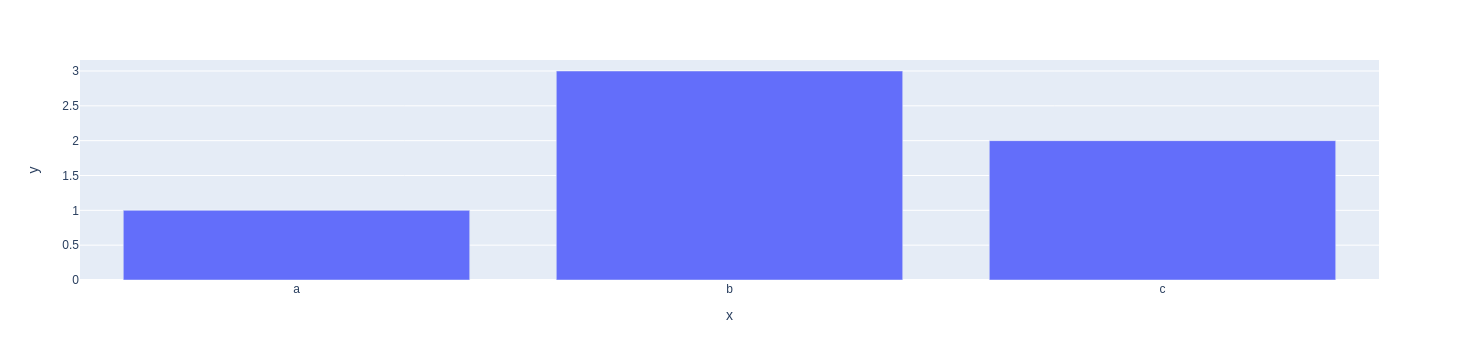

In [7]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()